# Task 6: Prediction using Decision Tree Algorithm
Create the Decision Tree classifier for Iris dataset and visualize it graphically.

# Bhakti Khivansara

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1.Reading dataset and analyzing the data


In [4]:
iris=pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
iris.duplicated().sum()

0

# 2.Pre-processing step

In [8]:
iris.drop('Id',axis=1,inplace=True)

In [9]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
x=iris.iloc[:,:-1]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y=iris.iloc[:,4]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [14]:
len(x_train)


105

In [15]:
len(x_test)


45

# 3. Constructing and training the model


In [16]:
from sklearn.tree import DecisionTreeClassifier as dtc,plot_tree
dtmodel=dtc(random_state=0)   #construction of the Decision Tree model
model=dtmodel.fit(x_train,y_train)   #train model
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
cnames=iris.Species.unique()  #class name
fnames=x.columns   #feature names


In [18]:
cnames


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
fnames


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

The decision tree is:


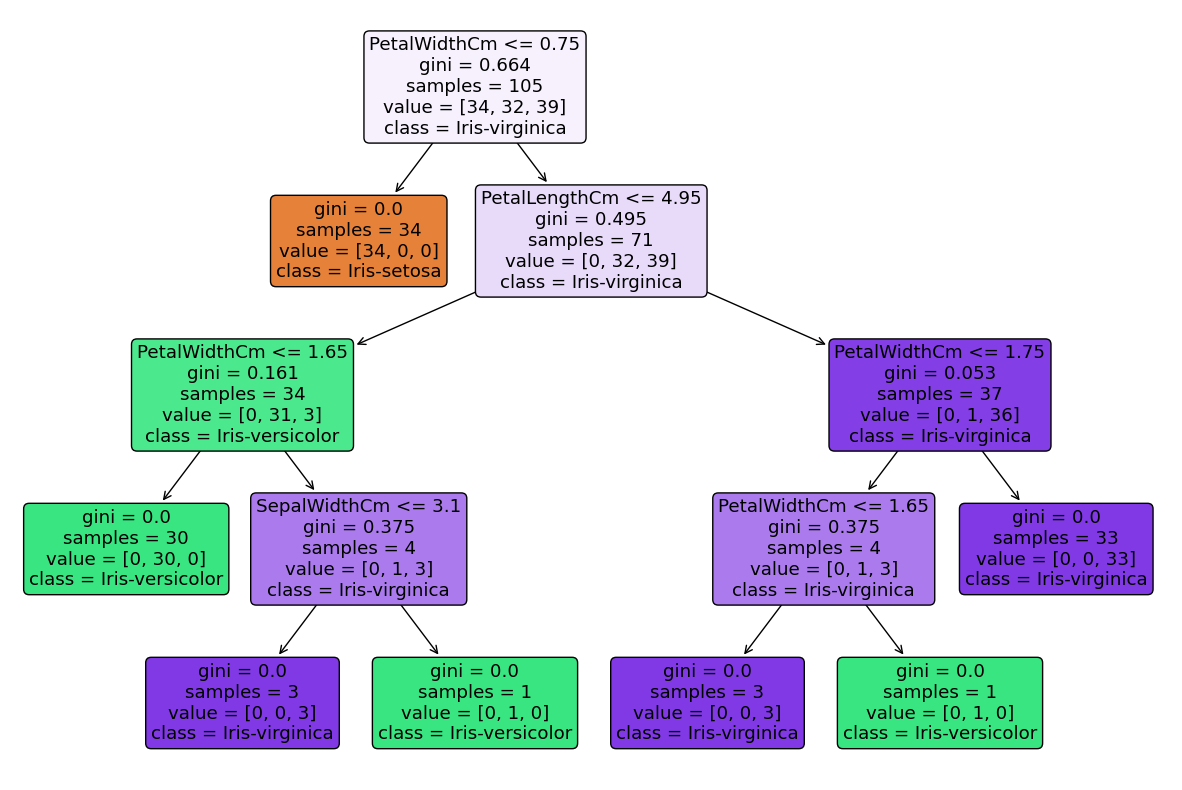

In [20]:
plt.figure(figsize=(15,10))
plot_tree(model,feature_names=fnames,class_names=cnames,filled=True,rounded=True)
print("The decision tree is:")


# 4. Testing and evaluating the model


In [21]:
predicted=model.predict(x_test)
cmp=pd.DataFrame({'Predicted_class':predicted,'Actual_class':y_test})
cmp.head()


,Predicted_class,Actual_class
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa


In [22]:
from sklearn import metrics
print('Accuracy of the decision tree is',"{:.4f}".format(metrics.accuracy_score(predicted,y_test)))


Accuracy of the decision tree is 0.9778


# Accuracy=97%

# 5.Feeding new data to predict its class



In [23]:
sl=4.5
sw=6.4
pl=4.4
pw=3.3
new=[[sl,sw,pl,pw]]
result=model.predict(new)
print(result)

['Iris-versicolor']


For reference:


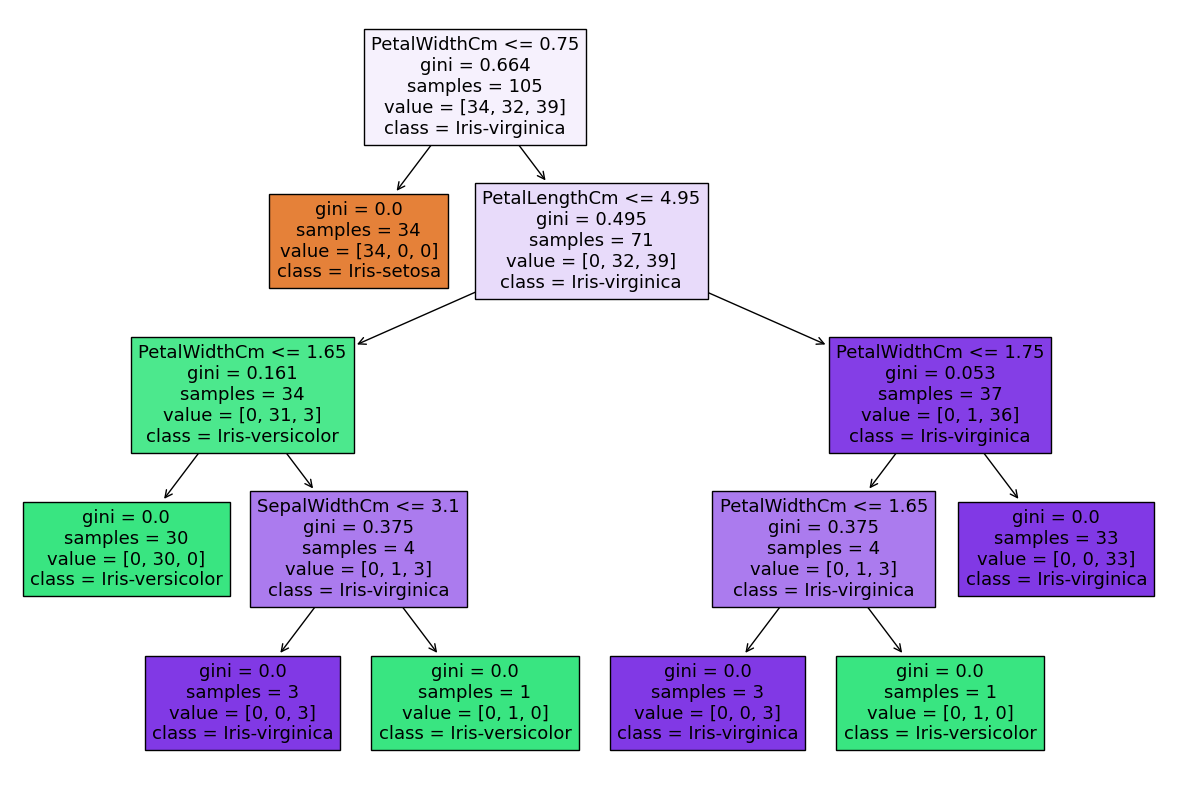

In [24]:
#plotting again for ref
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=fnames, class_names=cnames, filled=True)
print("For reference:")

# THANKYOU
